# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load ="C:/Users/Nikki/Desktop/Data_Analysis/PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load ="C:/Users/Nikki/Desktop/Data_Analysis/PyBer_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby(['type']).sum()['driver_count']
driver_count_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare']
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fares_per_ride_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / pyber_data_df.set_index(['type']).groupby(['type']).count()['fare']
average_fares_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fares_per_driver_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / city_data_df.set_index(['type']).groupby(['type']).sum()['driver_count']
average_fares_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count_by_type,
          "Total Drivers": driver_count_by_type,
          "Total Fares": total_fares_by_type,
          "Average Fare per Ride": average_fares_per_ride_by_type,
          "Average Fare per Driver": average_fares_per_driver_by_type})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
#  8. Format the columns.
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count_by_type.map("{:,}".format),
          "Total Drivers": driver_count_by_type.map("{:,}".format),
          "Total Fares": total_fares_by_type.map("${:,.2f}".format),
          "Average Fare per Ride": average_fares_per_ride_by_type.map("${:,.2f}".format),
          "Average Fare per Driver": average_fares_per_driver_by_type.map("${:,.2f}".format)})
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [10]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.020000e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.780000e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.260000e+12,4,Rural


In [11]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_type_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_data_type_date_df.head(10)

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
      1/18/2019 0:46   15.12
      1/18/2019 7:36   43.57
      1/19/2019 11:40  49.44
      1/19/2019 12:38  38.68
      1/19/2019 20:21  56.78

In [12]:
# 3. Reset the index on the DataFrame you created in #2. This is needed to use the 'pivot()' function.
pyber_data_type_date_df = pyber_data_type_date_df.reset_index()
pyber_data_type_date_df.head(10) 


,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
5,Rural,1/18/2019 0:46,15.12
6,Rural,1/18/2019 7:36,43.57
7,Rural,1/19/2019 11:40,49.44
8,Rural,1/19/2019 12:38,38.68
9,Rural,1/19/2019 20:21,56.78


In [13]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_table = pyber_data_type_date_df.pivot(index="date", columns="type", values="fare")
pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [14]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pivot_table_df = pivot_table.loc['1-1-2019':'4-29-2019']
pivot_table_df.tail(10)

type,Rural,Suburban,Urban
date,,,
3/9/2019 14:47,NaN,NaN,35.68
3/9/2019 16:59,NaN,NaN,6.50
3/9/2019 23:07,NaN,26.24,NaN
3/9/2019 23:45,NaN,NaN,19.89
3/9/2019 2:23,NaN,35.30,NaN
3/9/2019 3:25,NaN,NaN,39.32
3/9/2019 3:50,NaN,NaN,40.86
3/9/2019 4:39,NaN,NaN,14.41
3/9/2019 6:26,NaN,NaN,42.81


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

pivot_table_df.index = pd.to_datetime(pivot_table_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()

pivot_table_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1646 entries, 2019-01-01 00:08:00 to 2019-03-09 09:54:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     79 non-null     float64
 1   Suburban  431 non-null    float64
 2   Urban     1138 non-null   float64
dtypes: float64(3)
memory usage: 51.4 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_table_df_weekly = pivot_table_df.resample('W').sum()
pivot_table_df_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 0, 'Month')

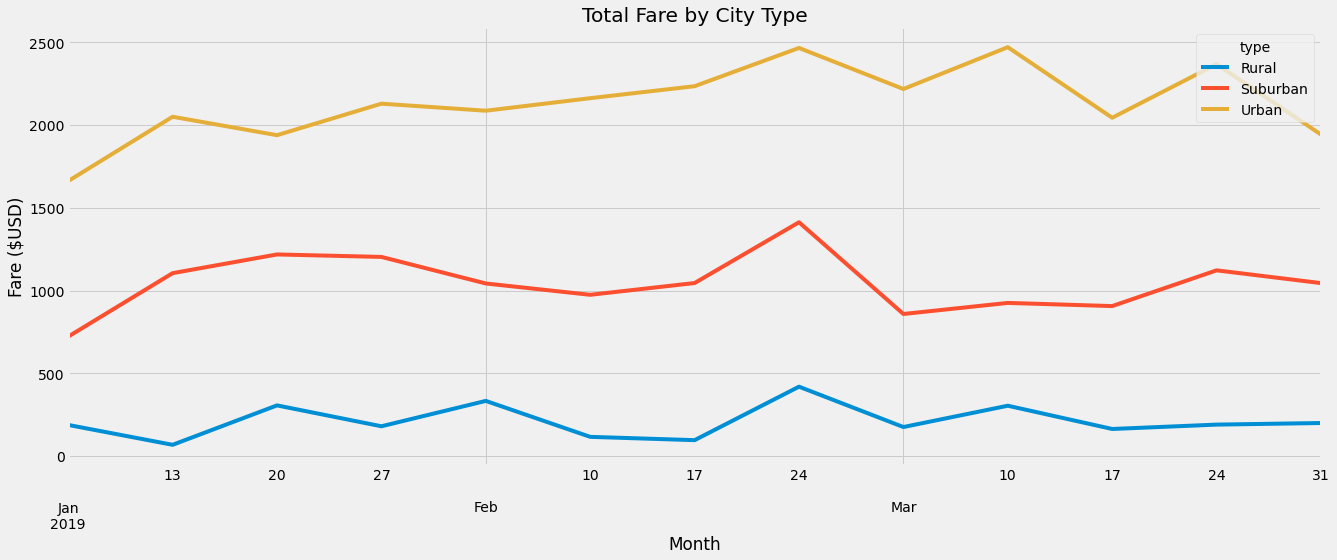

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

# Create a plot
ax = pivot_table_df_weekly.plot(figsize=(20, 7.5))
                                
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")
